# Belief Networks - Uncertainty

* Load the Dataset
* Create an Ensemble of Character Recognition Experts (5x) with different accuracies
* Each Expert Reviews Test Set (10,000 images), and provides Accuracy.
* Use Expert Ratings as well as Expect Accuracy to create Belief Network.
* 6th Expert reads in an unseen character and classifies it.
* The Belief Network States which images it is most like.
* The belief network recasts the 6th experts prediction to reflect uncertainty in training data.

## Loading the Dataset - MNIST

In [1]:
# Import Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import csv
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.models import load_model
from scipy.optimize import minimize



# Importing the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



/Users/christopherwaight/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Creating a Few Expert Models

In [24]:
# # Random Seed
# np.random.seed(12883)

# # Saving the Scores of the Models
# scores = []

# # Create Expert 1
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# model.summary()

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history = model.fit(train_images, train_labels, epochs=4, batch_size=64, validation_split=0.1)

# test_loss, test_acc = model.evaluate(test_images, test_labels)
# scores.append(test_acc)
# print(f"Test accuracy: {test_acc}")


# # Model 2
# # Create the model
# model2 = models.Sequential([
#     layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(16, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(16, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(16, activation='relu'),
#     layers.Dense(12, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# model2.summary()

# model2.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history = model2.fit(train_images, train_labels, epochs=6, batch_size=40, validation_split=0.1) #6

# test_loss, test_acc = model2.evaluate(test_images, test_labels)
# print(f"Test accuracy: {test_acc}")
# scores.append(test_acc)


# # Model 3

# # Create the model
# model3 = models.Sequential([
#     layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     #layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(32, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(16, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# model3.summary()

# model3.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history = model3.fit(train_images, train_labels, epochs=2, batch_size=1020, validation_split=0.25)

# test_loss, test_acc = model3.evaluate(test_images, test_labels)
# print(f"Test accuracy: {test_acc}")
# scores.append(test_acc)

# # Model 4

# # Create the model
# model4 = models.Sequential([
#     layers.Conv2D(32, (7, 7), activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((4, 4)),
#     layers.Conv2D(16, (1, 1), activation='relu'),
#     #layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(32, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(8, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# model4.summary()

# model4.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history = model4.fit(train_images, train_labels, epochs=2, batch_size=320, validation_split=0.2)

# test_loss, test_acc = model4.evaluate(test_images, test_labels)
# print(f"Test accuracy: {test_acc}")
# scores.append(test_acc)

# # Model 5

# # Create the model
# model5 = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     #layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (1, 1), activation='relu'),
#     layers.MaxPooling2D((4, 4)),
#     layers.Conv2D(8, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(16, activation='relu'),
#     layers.Dense(16, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# model5.summary()

# model5.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history = model5.fit(train_images, train_labels, epochs=9, batch_size=2500, validation_split=0.1) # epochs9

# test_loss, test_acc = model5.evaluate(test_images, test_labels)
# print(f"Test accuracy: {test_acc}")
# scores.append(test_acc)

# # Model 6

# # Create the model
# model6 = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     #layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (1, 1), activation='relu'),
#     layers.AveragePooling2D((4, 4)),
#     layers.Conv2D(8, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(16, activation='relu'),
#     layers.Dense(12, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# model6.summary()

# model6.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history = model6.fit(train_images, train_labels, epochs=7, batch_size=1000, validation_split=0.25) #epochs10

# test_loss, test_acc = model6.evaluate(test_images, test_labels)
# print(f"Test accuracy: {test_acc}")
# scores.append(test_acc)

# print(' The total Accuracy of the models are: ', scores)

# # Saving the models
# model1_path = "mnist_expert1.keras"
# model2_path = "mnist_expert2.keras"
# model3_path ="mnist_expert3.keras"
# model4_path = "mnist_expert4.keras"
# model5_path = "mnist_expert5.keras"
# model6_path = "mnist_expert6.keras"

# model.save(model1_path)
# model2.save(model2_path)
# model3.save(model3_path)
# model4.save(model4_path)
# model5.save(model5_path)
# model6.save(model6_path)


## Load Experts

In [2]:
# Model Paths
model1_path = "mnist_expert1.keras"
model2_path = "mnist_expert2.keras"
model3_path = "mnist_expert3.keras"
model4_path = "mnist_expert4.keras"
model5_path = "mnist_expert5.keras"
model6_path = "mnist_expert6.keras"

scores = []

# Load Expert 1
model = load_model(model1_path)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy of Expert 1: {test_acc}")
scores.append(test_acc)

# Load Expert 2
model2 = load_model(model2_path)
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f"Test accuracy of Expert 2: {test_acc}")
scores.append(test_acc)

# Load Expert 3
model3 = load_model(model3_path)
test_loss, test_acc = model3.evaluate(test_images, test_labels)
print(f"Test accuracy of Expert 3: {test_acc}")
scores.append(test_acc)

# Load Expert 4
model4 = load_model(model4_path)
test_loss, test_acc = model4.evaluate(test_images, test_labels)
print(f"Test accuracy of Expert 4: {test_acc}")
scores.append(test_acc)

# Load Expert 5
model5 = load_model(model5_path)
test_loss, test_acc = model5.evaluate(test_images, test_labels)
print(f"Test accuracy of Expert 5: {test_acc}")
scores.append(test_acc)

# Load Expert 6
model6 = load_model(model6_path)
test_loss, test_acc = model6.evaluate(test_images, test_labels)
print(f"Test accuracy of Expert 6: {test_acc}")
scores.append(test_acc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0512
Test accuracy of Expert 1: 0.9872999787330627
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9806 - loss: 0.0549
Test accuracy of Expert 2: 0.9835000038146973
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9699 - loss: 0.1065
Test accuracy of Expert 3: 0.9735000133514404
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9100 - loss: 0.3059
Test accuracy of Expert 4: 0.9253000020980835
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9345 - loss: 0.2044
Test accuracy of Expert 5: 0.9448999762535095
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9537 - loss: 0.2409
Test accuracy of Expert 6: 0.9609000086784363


## Asking Each Expert to rate 10,000 images

The Accuracies of the experts are:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


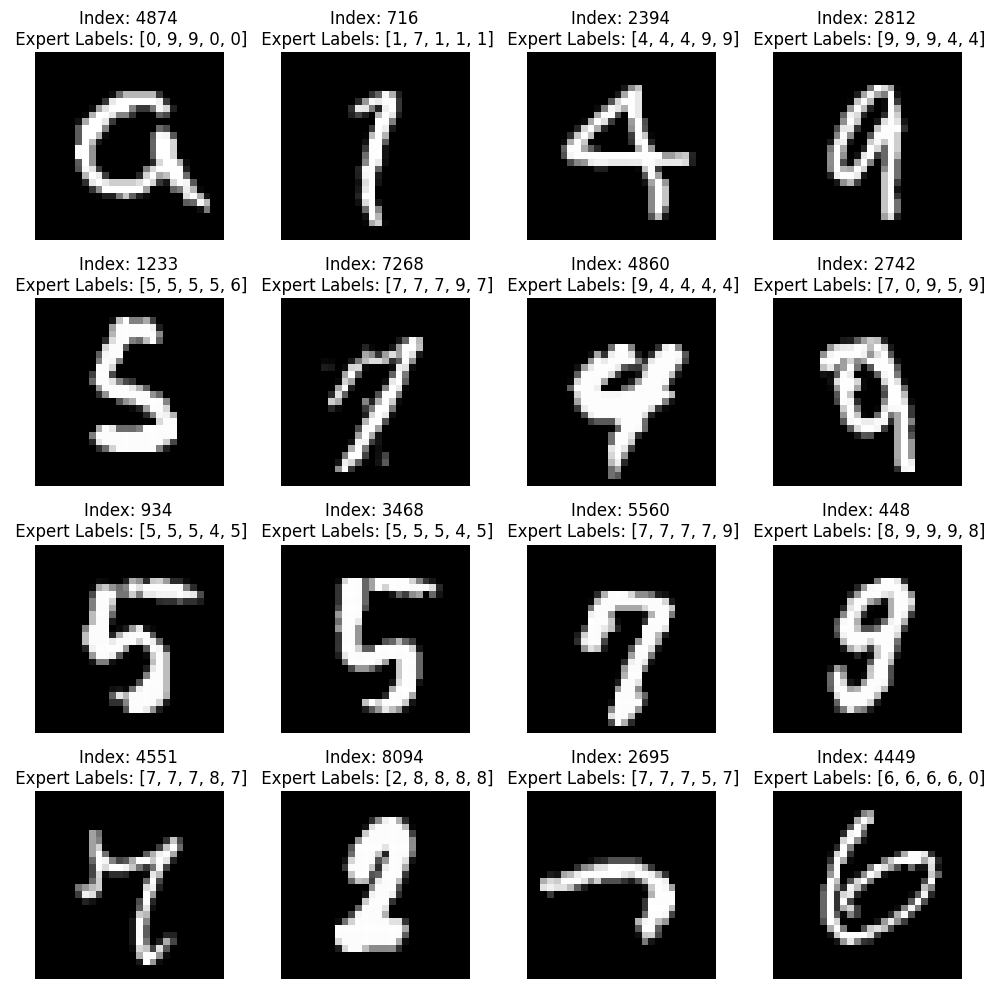

Index: 4874
Model 1 prediction: 0, softmax output: 0.5808643102645874
Model 2 prediction: 9, softmax output: 0.6556856632232666
Model 3 prediction: 9, softmax output: 0.6244736909866333
Model 4 prediction: 0, softmax output: 0.8292720913887024
Model 5 prediction: 0, softmax output: 0.9296877384185791
Index: 716
Model 1 prediction: 1, softmax output: 0.5629079937934875
Model 2 prediction: 7, softmax output: 0.6154250502586365
Model 3 prediction: 1, softmax output: 0.9451903700828552
Model 4 prediction: 1, softmax output: 0.4176621735095978
Model 5 prediction: 1, softmax output: 0.9282307624816895
Index: 2394
Model 1 prediction: 4, softmax output: 0.9997950196266174
Model 2 prediction: 4, softmax output: 0.9990608096122742
Model 3 prediction: 4, softmax output: 0.826348066329956
Model 4 prediction: 9, softmax output: 0.45515120029449463
Model 5 prediction: 9, softmax output: 0.6572045087814331
Index: 2812
Model 1 prediction: 9, softmax output: 0.9993529915809631
Model 2 prediction: 9, so

In [3]:
# Random Seed
np.random.seed(502)

# Find the Softmax outputs of each model
predictions = [model.predict(test_images), model2.predict(test_images), model3.predict(test_images),
               model4.predict(test_images), model5.predict(test_images)]


# Convert softmax outputs to class predictions
predicted_classes = [np.argmax(pred, axis=1) for pred in predictions]


# True classes
true_classes = np.argmax(test_labels, axis=1)

# Identify misclassified examples for each model
misclassified_by_model = [np.where(pred_classes != true_classes)[0] for pred_classes in predicted_classes]

# Sort indices by the number of times they were misclassified, in descending order
misclassification_counts = {}

for model_misclassified_indices in misclassified_by_model:
    for index in model_misclassified_indices:
        if index in misclassification_counts:
            misclassification_counts[index] += 1
        else:
            misclassification_counts[index] = 1

sorted_misclassified_indices = sorted(misclassification_counts, key=misclassification_counts.get, reverse=True)
#top_misclassified = sorted_misclassified_indices[:10]

# Display 16 random images from misclassified indices in a 4x4 grid
random_misclassified_indices = np.random.choice(sorted_misclassified_indices, 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for ax, index in zip(axes.flatten(), random_misclassified_indices):
    ax.imshow(test_images[index].reshape(28, 28), cmap='gray')
    predictions_for_plot = [predicted_classes[i][index] for i in range(5)]  # Predictions from all models for this index
    ax.set_title(f"Index: {index}\n Expert Labels: {predictions_for_plot}")#, Actual: {true_classes[index]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Corrected section for printing prediction and softmax output
for index in random_misclassified_indices:
    print(f"Index: {index}")
    for i in range(5):
        print(f"Model {i+1} prediction: {predicted_classes[i][index]}, softmax output: {np.max(predictions[i][index])}")

    
#    print(f"True class: {true_classes[index]}") # Uncomment to print the true class


## Combining Expert Evaluations into 1 Belief Network

We now have:
* The Accuracy Rating of Each Expert.
* The Self Confidence of Each Expert's labelling.
* Total number of images.

We can Combining these evaluations as:
For each Image Index
    For each Model/Classifier
        Print the Scaled Confidence Score of each possible class (Confidence Score * the model's accuracy)
        Calculate error bounds [a,b] as +/- 1.96 * sqrt(p(1-p)/n) where p = model accuracy, n = number of samples
        Determine width of the triangle at the error bounds = (b - a)*confidence score
        Determine height at confidence score = 2/width
        
        
    Aggregate the heights and widths and confidence score of the models for each class
Return the image index, average confidence score, the average height and the average width for each class

N = number of samples = 10000 

Expert Accuracies (mean): [1,2,3,4,5]
Expert Unvertainties (Std deviation): 


In [4]:
# For each Image Index
#     For each Model/Classifier
#         Print the Scaled Confidence Score of each possible class (Confidence Score * the model's accuracy)
#         Calculate the Scaled Standard Deviation (Standard Deviation of model)
        
        
#     Find the average confidence score for each class as np.mean(total_confidence)
#     Find the variance for each class as np.sum(variance) + np.var(total_confidence)
# Return the image index, average confidence score, the standard deviation, and the variance for each class


# Initialize variables
n = 10000 # Number of samples
accuracies = np.array(scores)  

# Standard deviation for each model
standard_deviations = np.sqrt(accuracies * (1 - accuracies) / n) 

# Calculating the outputs from several expert models
softmax_outputs = [model.predict(test_images), model2.predict(test_images), model3.predict(test_images),
                   model4.predict(test_images), model5.predict(test_images)]

# Initialize a 3D array to store the results # Shape: (2 metrics, 10 classes, number of images)
results = np.zeros((2, 10, len(test_images)))  

# For each Image
for index in range(len(test_images)):  # Assuming test_images is defined
    for class_idx in range(10):  # Assuming 10 classes
        total_confidence = []
        total_devs = []

        
        for i, softmax_output in enumerate(softmax_outputs):
            confidence_score = softmax_output[index, class_idx]  # Confidence score for this class from the i-th model
            scaled_confidence = confidence_score * accuracies[i]  # Scaled confidence score
            
            total_confidence.append(scaled_confidence)
            total_devs.append(standard_deviations[i])
        
        # Calculate averages for this class for this image
        avg_confidence = np.mean(total_confidence)
        total_variance = np.sum([dev**2 for dev in total_devs])+np.var(total_confidence)
        
        
        # Store the averages in the results array
        results[0, class_idx, index] = avg_confidence
        results[1, class_idx, index] = total_variance**0.5


# Example: Print the results for the first image across all classes for each metric
print(f"Average Confidence Scores for Image 0: {results[0, :, 0]}")
print(f"Average standard deviation for Image 0: {results[1, :, 0]}")
print(f"True class: {true_classes[0]}, argmax: {np.argmax(results[0, :, 0])}")

# Show Image 




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Average Confidence Scores for Image 0: [4.46289856e-07 4.18551834e-05 3.38931856e-04 3.75674638e-04
 7.24020620e-08 2.07263116e-06 6.14047928e-11 9.61848166e-01
 5.14578682e-05 2.41271737e-04]
Average standard deviation for Image 0: [0.00419223 0.00419307 0.00421042 0.00423614 0.00419223 0.00419223
 0.00419223 0.02532324 0.00419335 0.00420792]
True class: 7, argmax: 7


### Now, A brand new image.

If we get a brand new image, we can 'somehow' determine which labels it is most like (using Expert 6)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Expert 6 says it is most likely a: 5
The softmax values are  [[0.   0.04 0.02 0.16 0.16 0.39 0.02 0.01 0.15 0.05]]

[8.91902270e-05 9.00912921e-05 1.21058509e-04 7.66199152e-05
 9.72233914e-05 7.54221840e-05 1.08090625e-04 8.97634432e-05
 1.01057898e-04] Total Phi Mapping:  10000
Most similar image 645 with SSIM: 0.00019863164342076055
The 9 most similar images are: [2586 8082  955 7324 7315 2727  450 2951  645]
Most similar image 645 with PSNR: 14.879201110398174


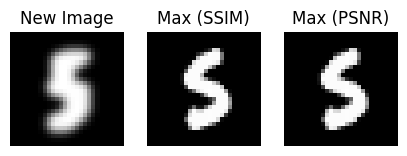

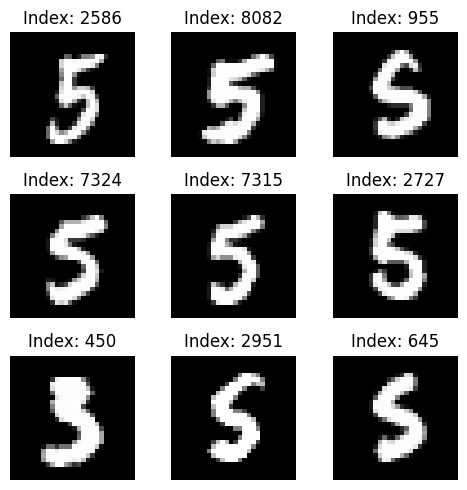

In [5]:
# Load a new image
image_path = "new_character2.JPG"
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_resized = cv2.resize(image_gray, (28, 28)) 
image_resized = 1-(image_resized / 255.0)
image_resized[image_resized<0.50]=0
image_resized = cv2.medianBlur(np.float32(image_resized),3)
#image_resized = cv2.medianBlur(np.float32(image_resized),3)



# Taking a matrix of size 5 as the kernel 
kernel = np.ones((2, 2), np.uint8)
image_resized = cv2.dilate(image_resized, kernel, iterations=2)
image_resized = cv2.erode(image_resized, kernel, iterations=1) 
image_resized = cv2.GaussianBlur(image_resized,(3,3),0)


kernel = np.ones((1, 3), np.uint8)
image_resized = cv2.dilate(image_resized, kernel, iterations=2)
image_resized = cv2.erode(image_resized, kernel, iterations=1) 
image_resized = cv2.GaussianBlur(image_resized,(3,3),0)

#image_resized = cv2.dilate(image_resized, kernel, iterations=1)
#image_resized = cv2.erode(image_resized, kernel, iterations=1)
#image_resized = cv2.medianBlur(np.float32(image_resized),3)



guess = model6.predict(image_resized.reshape(1, 28, 28, 1))
print('Expert 6 says it is most likely a:', np.argmax(guess))
print('The softmax values are ', np.round(guess, 2))
print()

# Similarly, if we knew the mapping from this image to each of the test images, it would look like:
# SSIM between the image and each test image
ssim_values = [ssim(image_resized, test_images[i].reshape(28, 28), data_range=1.0) for i in range(len(test_images))]
ssim_scores = np.array(ssim_values)  # Your SSIM scores
ssim_scores += abs(np.min(ssim_scores))  # Make all scores non-negative
ssim_values = ssim_scores / np.sum(ssim_scores)  # Normalize to sum up to 1
print(ssim_values[1:10], "Total Phi Mapping: ", len(ssim_values))

# Print index of the most similar image
print('Most similar image',np.argmax(ssim_values), 'with SSIM:', np.max(ssim_values))
print('The 9 most similar images are:', np.argsort(ssim_values)[-9:])

# Calculate PSNR between the image and each test image
psnr_values = [cv2.PSNR(image_resized.astype(np.float32), test_images[i].reshape(28, 28).astype(np.float32), R=1) for i in range(len(test_images))]


# Print index of the most similar image
print('Most similar image', np.argmax(psnr_values), 'with PSNR:', np.max(psnr_values))

# Show Image
plt.figure(figsize=(5, 9))
plt.subplot(1, 3, 1)
plt.imshow(image_resized, cmap='gray')
plt.title('New Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(test_images[np.argmax(ssim_values)].reshape(28, 28), cmap='gray')
plt.title('Max (SSIM)')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(test_images[np.argmax(psnr_values)].reshape(28, 28), cmap='gray')
plt.title('Max (PSNR)')
plt.axis('off')

# Plotting the 9 most similar images in a 3x3 grid
indices_of_most_similar = np.argsort(ssim_values)[-9:]

fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for idx, ax in enumerate(axes.flat):
    ax.imshow(test_images[indices_of_most_similar[idx]], cmap='gray')
    ax.set_title(f"Index: {indices_of_most_similar[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


plt.show()

In [29]:
# #Show some guesses

# guess = model.predict(image_resized.reshape(1, 28, 28, 1))
# print('Expert 1 says it is most likely a:', np.argmax(guess))
# print('The softmax values are ', np.round(guess, 2))
# print()

# guess = model2.predict(image_resized.reshape(1, 28, 28, 1))
# print('Expert 2 says it is most likely a:', np.argmax(guess))
# print('The softmax values are ', np.round(guess, 2))
# print()

# guess = model3.predict(image_resized.reshape(1, 28, 28, 1))
# print('Expert 3 says it is most likely a:', np.argmax(guess))
# print('The softmax values are ', np.round(guess, 2))
# print()

# guess = model4.predict(image_resized.reshape(1, 28, 28, 1))
# print('Expert 4 says it is most likely a:', np.argmax(guess))
# print('The softmax values are ', np.round(guess, 2))
# print()

# guess = model5.predict(image_resized.reshape(1, 28, 28, 1))
# print('Expert 5 says it is most likely a:', np.argmax(guess))
# print('The softmax values are ', np.round(guess, 2))
# print()

# Implementing Algorithm 1

L=F*Phi

Given:
* F - The belief network distributions
* Phi - How much it looks like each image

Solve:
* L - Which labels, and with what certainty

In [305]:
# # For each of the test images, create a vector sampling from a normal distribution
# # The mean is the average confidence score for each class for the test image, results[0, :, index]
# # The standard deviation is the average standard deviation for each class for the test image, results[1, :, index]
# # The length of the vector is the number of test images
# # Combine the vectors for each class into a matrix M of shape (10, number of test images)

# np.random.seed(123)

# # Assuming the `results` array is already populated as per your previous code
# num_classes = 10  # Number of classes
# num_images = len(test_images)  # Number of test images

# # Initialize the matrix M
# M = np.zeros((num_classes, num_images))

# # Populate the matrix
# for class_idx in range(num_classes):
#     for image_idx in range(num_images):
#         mean_confidence = results[0, class_idx, image_idx]  # Average confidence for this class & image
#         std_deviation = results[1, class_idx, image_idx]  # Standard deviation for this class & image
        
#         # Sample from a normal distribution with the computed mean and standard deviation
#         M[class_idx, image_idx] = np.random.normal(mean_confidence, std_deviation)

# # M is now the matrix you wanted to compute
# print('The matrix M has the shape:', M.shape)

# # L is M matrix multiplied by phi
# L = M @ np.array(phi).reshape(-1, 1)

# print('The shape of phi is:', len(phi))
# print('The matrix L has the shape:', L.shape)


The matrix M has the shape: (10, 10000)
The shape of phi is: 10000
The matrix L has the shape: (10, 1)


In [31]:
# import numpy as np

# np.random.seed(123)  # Ensure reproducibility

# num_classes = 10  # Number of classes
# num_images = len(test_images)  # Assuming 'test_images' has been defined previously
# new_dim = 20  # The new dimension size

# # Step 1: Expand M to a 3D matrix
# # Initialize the expanded 3D matrix M_expanded
# M_expanded = np.zeros((num_classes, num_images, new_dim))

# for class_idx in range(num_classes):
#     for image_idx in range(num_images):
#         for new_idx in range(new_dim):
#             mean_confidence = results[0, class_idx, image_idx]
#             std_deviation = results[1, class_idx, image_idx]
#             # Resample for each new dimension
#             M_expanded[class_idx, image_idx, new_idx] = np.random.normal(mean_confidence, std_deviation)

# # Step 2: Adjust phi to new shape
# # Assuming 'phi' is defined as your SSIM values vector with shape (10000,)
# phi_expanded = np.tile(phi, (new_dim, 1)).T  # Transpose to get (10000, 20000)

# # Step 3: Compute new L
# # This step requires a bit of adjustment in how we think about matrix multiplication due to the shapes involved.
# # We perform the operation across the matching dimensions of M_expanded and phi_expanded.
# L = np.empty((num_classes, new_dim))

# for i in range(num_classes):
#     for j in range(new_dim):
#         # Here, we're essentially doing a dot product of each "slice" across all test images for a single class
#         L[i, j] = np.dot(M_expanded[i, :, j], phi_expanded[:, j])

# print('M_expanded shape:', M_expanded.shape)
# print('phi_expanded shape:', phi_expanded.shape)
# print('L shape:', L.shape)


M_expanded shape: (10, 10000, 20)
phi_expanded shape: (10000, 20)
L shape: (10, 20)


In [6]:
np.random.seed(1023)  # Ensure reproducibility

phi = ssim_values.copy()


# Assuming phi is a numpy array of shape (10000, 1)
def keep_top_k(phi, k):
    sorted_indices = np.argsort(-phi.flatten())  # Sort in descending order
    top_k_indices = sorted_indices[:k]
    phi_filtered = np.zeros_like(phi)
    phi_filtered[top_k_indices] = phi[top_k_indices]
    return phi_filtered

# Example usage:
k = 200  # Number of largest elements to keep
phi = keep_top_k(phi, k)

phi = phi/np.sum(phi)
initial_phi = phi.copy()

num_classes = 10  # Number of classes
num_images = len(test_images)  # Assuming 'test_images' has been defined previously
new_dim = 1000  # The new dimension size


# Generate random samples directly based on 'results'
mean_confidences = results[0, :, :, np.newaxis]  # Shape: (num_classes, num_images, 1)
std_deviations = results[1, :, :, np.newaxis]  # Shape: (num_classes, num_images, 1)

# Use broadcasting to generate the new dimensions
phi_expanded = np.tile(phi, (new_dim, 1)).T 
M_expanded = np.random.normal(mean_confidences, std_deviations, (num_classes, num_images, new_dim))

# Compute L using einsum for efficient computation
L2 = np.einsum('ijk,jk->ik', M_expanded, phi_expanded)


#print('M_expanded shape:', M_expanded.shape)
#print('phi_expanded shape:', phi_expanded.shape)
#print('L shape:', L.shape)
print()

L2_avg = np.mean(L2, axis=1)
L2_std = np.std(L2, axis=1)

# Print the average L values for each class
# print('Average L2 values:', L2_avg)
# print()
# print('Standard Deviation L2 values:', L2_std)
print()
print(np.argmax(L2_avg))
print()

for idx in range(10):
    print(f'Class {idx}: ', L2_avg[idx]-L2_std[idx], L2_avg[idx]+L2_std[idx])




5

Class 0:  0.006613669499057572 0.010624803717968125
Class 1:  0.0036834363084226737 0.008588765933691272
Class 2:  0.017628046796708017 0.023288696572799476
Class 3:  0.3022275599470232 0.31378980409705526
Class 4:  0.0032582016308709827 0.008611669169728912
Class 5:  0.3173174643802176 0.33163205662405293
Class 6:  0.09068700592338338 0.09826666673732953
Class 7:  0.0015710197258132325 0.00467363888599744
Class 8:  0.161687465783088 0.17060855946618525
Class 9:  0.022551639777054443 0.02943170505013931


In [7]:
np.sum(phi)

0.9999999999999998

# Implementing Algorithm 2

L=F*Phi

Given:
* F - The belief network distributions
* L - Which labels, and with what certainty

Solve for:

* Phi - How much it looks like each image

Constaints:
* Each element of phi between 0 and 1
* Sum all elements of phi less than 1.

In [8]:
# Solve for Phi in the equation L = F * Phi

# Constaints:
# * Each element of phi between 0 and 1
# * Sum all elements of phi less than 1.


L = guess.copy()
L = L.reshape(10,)

F = np.zeros((num_classes, num_images)) # (10, 10000)
# Populate the matrix F
for class_idx in range(num_classes):
    for image_idx in range(num_images):
        mean_confidence = results[0, class_idx, image_idx]  # Average confidence for this class & image
        std_deviation = results[1, class_idx, image_idx]  # Standard deviation for this class & image
        
        F[class_idx, image_idx] = np.random.normal(mean_confidence, std_deviation)

# Solve for Phi using the method of least squares
phi, residuals, rank, s = np.linalg.lstsq(F, L, rcond=None)

print('Phi:', phi)
print('Sum of Phi:', np.sum(phi))
print('sum of initial Phi:', np.sum(initial_phi))
print('Checking for negatives in phi', phi[np.argmin(phi)])


Phi: [2.66554154e-07 1.19696044e-05 3.03787421e-05 ... 1.75665487e-04
 4.80124642e-04 6.32155346e-06]
Sum of Phi: 1.0044718621689772
sum of initial Phi: 0.9999999999999998
Checking for negatives in phi -0.00017060111394180875


### Trying using SLSQP - via simulated annealing

Best Error: 0.39316       Temperature: 0.001       step size:  0.05
Best Error: 0.3931       Temperature: 0.001       step size:  0.05
Best Error: 0.39292       Temperature: 0.001       step size:  0.05
Best Error: 0.3929       Temperature: 0.001       step size:  0.05
Best Error: 0.39289       Temperature: 0.001       step size:  0.05
Best Error: 0.39286       Temperature: 0.001       step size:  0.05
Best Error: 0.37964       Temperature: 0.001       step size:  0.05
Best Error: 0.35278       Temperature: 0.001       step size:  0.05
Best Error: 0.35274       Temperature: 0.001       step size:  0.05
Best Error: 0.35271       Temperature: 0.001       step size:  0.05
Best Error: 0.31258       Temperature: 0.001       step size:  0.05
Best Error: 0.31156       Temperature: 0.001       step size:  0.05
Best Error: 0.30341       Temperature: 0.001       step size:  0.05
Best Error: 0.29578       Temperature: 0.001       step size:  0.05
Best Error: 0.26443       Temperature: 0.001      

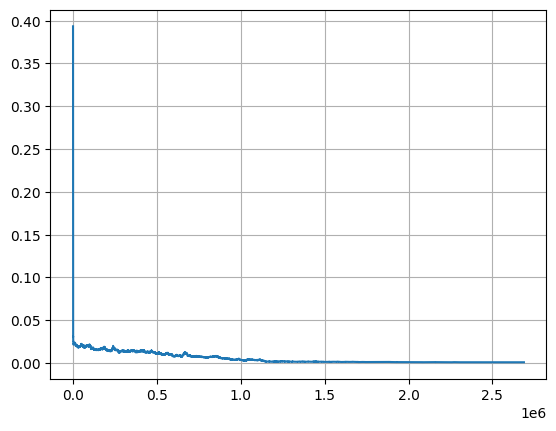

In [86]:
import numpy as np
import matplotlib.pyplot as plt

b= L.copy()


F = np.zeros((num_classes, num_images)) # (10, 10000)
# Populate the matrix F
for class_idx in range(num_classes):
    for image_idx in range(num_images):
        mean_confidence = results[0, class_idx, image_idx]  # Average confidence for this class & image
        std_deviation = results[1, class_idx, image_idx]  # Standard deviation for this class & image
        
        F[class_idx, image_idx] = np.random.normal(mean_confidence, std_deviation)


array = F.copy()
# Function to calculate the custom error
def calculate_error(phi):
    computed_b = np.dot(array, phi)
    diff = b - computed_b # Expected to be positive
    penalty1 = 4*np.sum(diff[diff < 0])  # Only sum negative differences and apply penalty
    penalty2 = 12.5 * np.min(diff) if np.min(diff) < 0 else 0
    penalty3 = 2*np.max(diff) # Super normal penalty for the largest positive difference
    #penalty4 = 1*np.linalg.norm(diff, ord=1)  # L1 norm penalty
    #penalty3 = 2.15*np.linalg.norm(diff, ord=2)  # L2 norm penalty
    penalties =  -penalty1 - penalty2 + penalty3 #+ penalty4 + penalty5
    return penalties

# Initial phi and error
initial_phi = np.zeros(10000)
computed_b = np.dot(array, initial_phi)
initial_error = calculate_error(initial_phi)

# Simulated Annealing setup
best_phi = initial_phi.copy()
best_error = initial_error
current_phi = best_phi.copy()
current_error = best_error

# Parameters
T = 10e-4  # Initial temperature
T_min = 10e-6  # Minimum temperature
alpha = 0.92  # Cooling rate
num_iterations = 48000  # Iterations per temperature
iter = 0
counter = []
error_values = []
step_size = 0.05


# Annealing process
while T > T_min:
    
    for i in range(num_iterations):
        iter += 1
        new_phi = current_phi.copy()
        index = np.random.randint(0, len(new_phi))
        change = np.random.uniform(-step_size, step_size)  # Adjust magnitude of change as needed
        new_phi[index] += change
        new_phi[new_phi < 0] = 0  # Ensure non-negativity

        # Check if the sum constraint is violated
        if np.sum(new_phi) > 1:
            continue  # Skip the rest of the loop and do not update current_phi or current_error

        # Calculate new error
        new_error = calculate_error(new_phi)

        # Acceptance condition
        if new_error < current_error or np.random.uniform() < np.exp((current_error - new_error) / T):
            current_phi = new_phi
            current_error = new_error
            counter.append(iter)
            error_values.append(current_error/2)
            if new_error < best_error:
                best_error = new_error
                best_phi = new_phi
                print("Best Error:", np.round(best_error/2,5), "      Temperature:", np.round(T,5), "      step size: ", np.round(step_size,4))

    # Cool down
    T *= alpha
    step_size*=0.945

# Output results
print("Best Error:", best_error/2)
print("Best Phi:", np.round(best_phi, 3))

# Plotting the error values for each iteration

plt.plot(counter, error_values)
plt.grid()
plt.show()

In [87]:
print ('Given b  ', np.round(b,4))
print()

vertices = [best_phi]

for vertex in vertices:
    comp_b = np.dot(array, vertex)
    error = np.linalg.norm(b - comp_b)
    print("Closest b ", np.round(comp_b,4))
    print('Difference ', np.round(b - comp_b,7))
    print('Inf Norm  ', np.max(b - comp_b))
    print("L2 Norm   ", error)

    print()

print('Best Phi:', np.round(best_phi,3))

Given b   [0.0017 0.039  0.0187 0.1631 0.1618 0.3932 0.015  0.0106 0.1511 0.0458]

Closest b  [0.0017 0.0381 0.0179 0.1622 0.161  0.3924 0.0142 0.0097 0.1503 0.045 ]
Difference  [2.520e-05 8.417e-04 8.504e-04 8.503e-04 8.293e-04 8.266e-04 8.170e-04
 8.480e-04 8.386e-04 8.419e-04]
Inf Norm   0.0008503766204127419
L2 Norm    0.0025149523490305956

Best Phi: [0. 0. 0. ... 0. 0. 0.]


In [69]:
# Print all of best phi in a csv file
with open('best_phi.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(best_phi)


In [89]:
print('Max element ', np.max(best_phi))
print('Number of elements greater than 0.00001', len(best_phi[best_phi > 0.00001]))
print('Total number of elements', len(best_phi))
print('Sum of best phi', np.sum(best_phi))


Max element  0.05173669909505544
Number of elements greater than 0.00001 439
Total number of elements 10000
Sum of best phi 0.9999999151838497


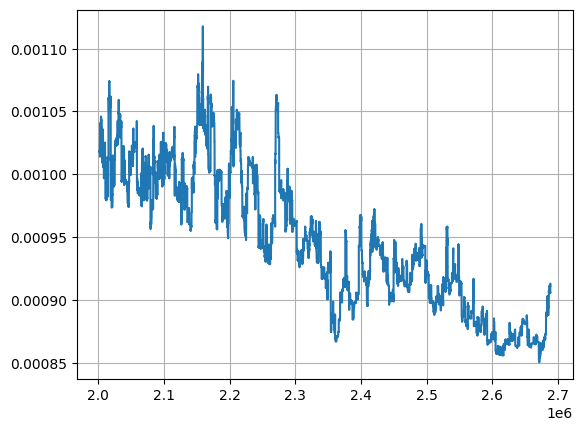

In [88]:
# Plot counters and error_values from 200000 to 500000
plt.plot(counter[1000000:], error_values[1000000:])
plt.grid()
plt.show()

#min34_run = best_phi.copy()

## MonteCarlo Approach

Worst Case Error: 0.48431084
Best Error: 0.094497479929122


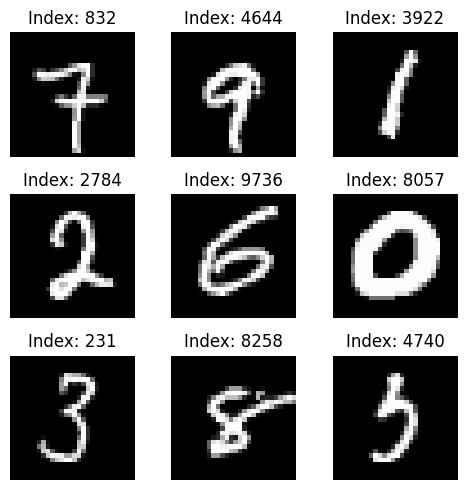

In [342]:
initial_phi = np.zeros(10000)
#initial_phi = ssim_values.copy()

# Calculate worst case error
error = np.linalg.norm(0 - guess)
print("Worst Case Error:", error)


# Defining some constants
num_classes = 10  
num_images = len(test_images)  
new_dim = 1000  


best_phi = np.zeros(10000)
best_error = error.copy()

# Generate random samples directly based on 'results'
mean_confidences = results[0, :, :] 
std_deviations = results[1, :, :] 
M_expanded = np.random.normal(mean_confidences, std_deviations, (num_classes, num_images))

for _ in range(1_000_000):
    # Choose k random indices
    k = 15  # You can choose any value for k
    initial_phi = np.zeros(10000)
    random_indices = np.random.choice(len(initial_phi), k, replace=False)
    
    
    numbers = []
    numbers.append(np.random.uniform(0,1))
    for _ in range(k-1):
        numbers.append(np.random.uniform(0, 1 - np.sum(numbers)))

    
    initial_phi[random_indices] = numbers

    L2 = np.dot(M_expanded, initial_phi)

    # Calculate error
    error = np.linalg.norm(L2 - guess)

    if error< best_error:
        best_error = error.copy()
        best_phi= initial_phi.copy()

print("Best Error:", best_error)
#print("Best Phi:", best_phi)

# Plotting the 9 most similar images in a 3x3 grid
indices_of_most = np.argsort(best_phi)[-9:]

fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for idx, ax in enumerate(axes.flat):
    ax.imshow(test_images[indices_of_most[idx]], cmap='gray')
    ax.set_title(f"Index: {indices_of_most[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Once the phi is discovered, we can put it through F again, and determine L.

In [64]:

# Defining some constants
num_classes = 10  
num_images = len(test_images)  
new_dim = 10000  

phi_expanded = np.tile(best_phi, (new_dim, 1)).T  # Transpose to get (10000, new_dim)


# Generate random samples directly based on 'results'
mean_confidences = results[0, :, :, np.newaxis]  # Shape: (num_classes, num_images, 1)
std_deviations = results[1, :, :, np.newaxis]  # Shape: (num_classes, num_images, 1)
M_expanded = np.random.normal(mean_confidences, std_deviations, (num_classes, num_images, new_dim))

L3 = np.einsum('ijk,jk->ik', M_expanded, phi_expanded)


# print('M_expanded shape:', M_expanded.shape)
# print('phi_expanded shape:', phi_expanded.shape)
# print()
L3_avg = np.mean(L3, axis=1)
L3_std = np.std(L3, axis=1)


# print('Average L3 values:', L3_avg)
# print()

# print('Standard Deviation L3 values:', L3_std)
print()

for idx in range(10):
    print(f'Class {idx}: {(L3_avg[idx]-L3_std[idx]):.4g}, {L3_avg[idx]+L3_std[idx]:.4g}')

print(guess)
print(L3_avg)
print((L3_avg-guess))


Class 0: 0.009426, 0.01694
Class 1: 0.0388, 0.03982
Class 2: 0.01693, 0.01866
Class 3: 0.1578, 0.1651
Class 4: 0.1413, 0.1554
Class 5: 0.3391, 0.3595
Class 6: 0.01313, 0.01655
Class 7: 0.01941, 0.02787
Class 8: 0.1397, 0.1508
Class 9: 0.04782, 0.05189
[[0.00170886 0.03895883 0.01871084 0.16308104 0.16178204 0.3932481
  0.01500941 0.01057794 0.15112421 0.04579876]]
[0.0131811  0.03931249 0.01779815 0.16145095 0.14835    0.34931182
 0.01484014 0.02363957 0.14520701 0.04985212]
[[ 0.01147224  0.00035366 -0.00091268 -0.00163009 -0.01343205 -0.04393629
  -0.00016927  0.01306163 -0.0059172   0.00405335]]


## Averaging Several Good Vectors

Worst Case Error: 0.48431084
Best Error: 0.15062274757760008
Best Error: 0.18604277677444114
Best Error: 0.14071513708217315
Best Error: 0.18861324881461386
Best Error: 0.0958227442107615
Best Error: 0.13637950427255927
Best Error: 0.09499556451049827
Best Error: 0.12269028215147543
Best Error: 0.14801423995971955
Best Error: 0.1331533557770921
Best Error: 0.17036673708019404
Best Error: 0.16693416462804683
Best Error: 0.18553128273257752
Best Error: 0.12244088726452217
Best Error: 0.1305403677368622
Best Error: 0.17873443245722398
Best Error: 0.1436230810670404
Best Error: 0.15998082442476838
Best Error: 0.1731917520099005
Best Error: 0.1707163387557109
Best Error: 0.10828923757657337
Best Error: 0.1124994951344285
Best Error: 0.15584783979415154
Best Error: 0.18868240986102183
Best Error: 0.14207397718649944
Best Error: 0.11769679810657932
Best Error: 0.14692904006328183
Best Error: 0.09756640277726392
Best Error: 0.14324391990320795
Best Error: 0.1676116806328225
Best Error: 0.13567

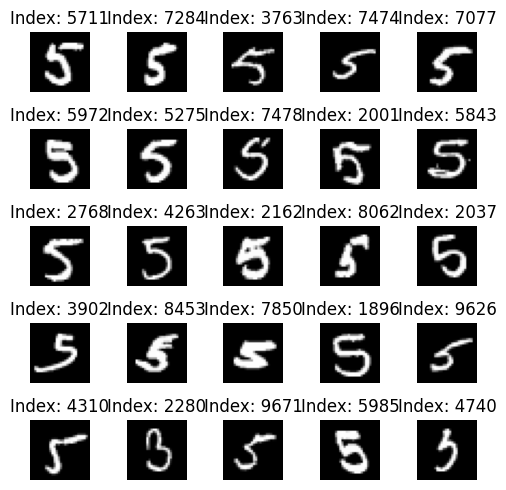

0.9975901862418994


In [467]:
initial_phi = np.zeros(10000)
#initial_phi = ssim_values.copy()

# Calculate worst case error
error = np.linalg.norm(0 - guess)
print("Worst Case Error:", error)


# Defining some constants
num_classes = 10  
num_images = len(test_images)  
new_dim = 1000  

alpha_phi = np.zeros(10000)

for _ in range(50):

    best_phi = np.zeros(10000)
    best_error = error.copy()

    # Generate random samples directly based on 'results'
    mean_confidences = results[0, :, :] 
    std_deviations = results[1, :, :] 
    M_expanded = np.random.normal(mean_confidences, std_deviations, (num_classes, num_images))

    for _ in range(5_000):
        # Choose k random indices
        k = 10  # You can choose any value for k
        initial_phi = np.zeros(10000)
        random_indices = np.random.choice(len(initial_phi), k, replace=False)
        
        
        numbers = []
        numbers.append(np.random.uniform(0,1))
        for _ in range(k-1):
            numbers.append(np.random.uniform(0, 1 - np.sum(numbers)))

        
        initial_phi[random_indices] = numbers

        L2 = np.dot(M_expanded, initial_phi)

        # Calculate error
        error = np.linalg.norm(L2 - guess) + 0.1*np.argmax(np.argmax(L2-guess),0)

        if error< best_error:
            best_error = error.copy()
            best_phi= initial_phi.copy()

    print("Best Error:", best_error)
    #print("Best Phi:", best_phi)
    alpha_phi += best_phi


alpha_phi = alpha_phi/50
# Plotting the 9 most similar images in a 3x3 grid
indices_of_most = np.argsort(alpha_phi)[-25:]

fig, axes = plt.subplots(5, 5, figsize=(5, 5))
for idx, ax in enumerate(axes.flat):
    ax.imshow(test_images[indices_of_most[idx]], cmap='gray')
    ax.set_title(f"Index: {indices_of_most[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

print(np.sum(alpha_phi))


In [468]:

# Defining some constants
num_classes = 10  
num_images = len(test_images)  
new_dim = 200  

phi_expanded = np.tile(alpha_phi, (new_dim, 1)).T  # Transpose to get (10000, new_dim)


# Generate random samples directly based on 'results'
mean_confidences = results[0, :, :, np.newaxis]  # Shape: (num_classes, num_images, 1)
std_deviations = results[1, :, :, np.newaxis]  # Shape: (num_classes, num_images, 1)
M_expanded = np.random.normal(mean_confidences, std_deviations, (num_classes, num_images, new_dim))

L3 = np.einsum('ijk,jk->ik', M_expanded, phi_expanded)


# print('M_expanded shape:', M_expanded.shape)
# print('phi_expanded shape:', phi_expanded.shape)
# print()
L3_avg = np.mean(L3, axis=1)
L3_std = np.std(L3, axis=1)


# print('Average L3 values:', L3_avg)
# print()

# print('Standard Deviation L3 values:', L3_std)
print()

for idx in range(10):
    print(f'Class {idx}: {(L3_avg[idx]-L3_std[idx]):.4g}, {L3_avg[idx]+L3_std[idx]:.4g}')

print(guess)
print(L3_avg)
print(sum(L3_avg))


Class 0: 0.009808, 0.01743
Class 1: 0.0209, 0.02287
Class 2: 0.01817, 0.02223
Class 3: 0.1461, 0.164
Class 4: 0.1518, 0.1593
Class 5: 0.399, 0.4218
Class 6: 0.01763, 0.02135
Class 7: 0.0137, 0.01787
Class 8: 0.1132, 0.1244
Class 9: 0.02472, 0.0342
[[0.00170886 0.03895883 0.01871084 0.16308104 0.16178204 0.3932481
  0.01500941 0.01057794 0.15112421 0.04579876]]
[0.01361685 0.02188487 0.0201968  0.15501857 0.1555411  0.41040137
 0.01948957 0.01578526 0.1187899  0.02946473]
0.960189019283996


In [469]:
print(L3_avg)
print(guess)
print(guess-L3_avg)

[0.01361685 0.02188487 0.0201968  0.15501857 0.1555411  0.41040137
 0.01948957 0.01578526 0.1187899  0.02946473]
[[0.00170886 0.03895883 0.01871084 0.16308104 0.16178204 0.3932481
  0.01500941 0.01057794 0.15112421 0.04579876]]
[[-0.01190798  0.01707396 -0.00148596  0.00806246  0.00624094 -0.01715326
  -0.00448017 -0.00520732  0.03233431  0.01633403]]


In [350]:

# Defining some constants
num_classes = 10  
num_images = len(test_images)  
new_dim = 1000  

phi_expanded = np.tile(alpha_phi/10, (new_dim, 1)).T  # Transpose to get (10000, new_dim)


# Generate random samples directly based on 'results'
mean_confidences = results[0, :, :, np.newaxis]  # Shape: (num_classes, num_images, 1)
std_deviations = results[1, :, :, np.newaxis]  # Shape: (num_classes, num_images, 1)
M_expanded = np.random.normal(mean_confidences, std_deviations, (num_classes, num_images, new_dim))

L3 = np.einsum('ijk,jk->ik', M_expanded, phi_expanded)

L3_avg = np.mean(L3, axis=1)
L3_std = np.std(L3, axis=1)



print()

for idx in range(10):
    print(f'Class {idx}: {(L3_avg[idx]-L3_std[idx]):.4g}, {L3_avg[idx]+L3_std[idx]:.4g}')

print(guess)
print(L3_avg)
print(sum(L3_avg))


Class 0: 0.001266, 0.001495
Class 1: 0.00171, 0.001849
Class 2: 0.001265, 0.001444
Class 3: 0.01506, 0.01578
Class 4: 0.0147, 0.01521
Class 5: 0.04075, 0.04192
Class 6: 0.001241, 0.001479
Class 7: 0.001015, 0.001124
Class 8: 0.01406, 0.01482
Class 9: 0.003021, 0.003397
[[0.00170886 0.03895883 0.01871084 0.16308104 0.16178204 0.3932481
  0.01500941 0.01057794 0.15112421 0.04579876]]
[0.00138037 0.00177986 0.00135453 0.01541815 0.01495444 0.04133289
 0.00136018 0.00106983 0.01444216 0.00320898]
0.09630138582263997


In [24]:
import numpy as np

# Coefficients matrix
A = np.array([[0.8, 0.9, 0.7],
              [0.2, 0.1, 0.3]])

# Constants vector
B = np.array([0.15, 0.85])

# Solve the system of equations using least squares
solution, residuals, _, _ = np.linalg.lstsq(A, B, rcond=None)

print("Solution:")
print("x1 =", solution[0])
print("x2 =", solution[1])
print("x3 =", solution[2])

x1 = solution[0]
x2 = solution[1]
x3 = solution[2]
# Given equations
eq1 = 0.8 * x1 + 0.9 * x2 + 0.7 * x3
eq2 = 0.2 * x1 + 0.1 * x2 + 0.3 * x3

# Print the evaluated equations
print("Evaluated Equations:")
print("0.8*x1 + 0.9*x2 + 0.7*x3 = ", eq1)
print("0.2*x1 + 0.1*x2 + 0.3*x3 = ", eq2)

best_error = 10000;

for _ in range(1_00_000):
        k = 3  # You can choose any value for k
        initial_phi = np.zeros(3)
        random_indices = np.random.choice(len(initial_phi), k, replace=False)
        
        
        numbers = []
        numbers.append(np.random.uniform(0,1))
        for _ in range(k-1):
            numbers.append(np.random.uniform(0, 1 - np.sum(numbers)))
        
        initial_phi[random_indices] = numbers

        initial_phi[2] = 1-(initial_phi[0]+initial_phi[1])

        L2 = np.dot(A, initial_phi)

        # Calculate error
        error = np.linalg.norm(L2 - B)

        if error< best_error:
            best_error = error.copy()
            best_phi= initial_phi.copy()

print()
print('best phi', best_phi)

x1 = best_phi[0]
x2 = best_phi[1]
x3 = best_phi[2]
# Given equations
eq1 = 0.8 * x1 + 0.9 * x2 + 0.7 * x3
eq2 = 0.2 * x1 + 0.1 * x2 + 0.3 * x3

# Print the evaluated equations
print("MonteCarlo Solutions to Equations:")
print("0.8*x1 + 0.9*x2 + 0.7*x3 = ", eq1)
print("0.2*x1 + 0.1*x2 + 0.3*x3 = ", eq2)



Solution:
x1 = 0.3333333333333325
x2 = -2.9166666666666656
x3 = 3.5833333333333326
Evaluated Equations:
0.8*x1 + 0.9*x2 + 0.7*x3 =  0.1499999999999999
0.2*x1 + 0.1*x2 + 0.3*x3 =  0.8499999999999996

best phi [3.24023139e-06 2.37308045e-06 9.99994387e-01]
MonteCarlo Solutions to Equations:
0.8*x1 + 0.9*x2 + 0.7*x3 =  0.7000007986392298
0.2*x1 + 0.1*x2 + 0.3*x3 =  0.2999992013607702


In [32]:
import numpy as np
from scipy.optimize import minimize

# Coefficients matrix
A = np.array([[0.8, 0.9, 0.7],
              [0.2, 0.1, 0.3]])

# Constants vector
B = np.array([0.15, 0.85])

# Define the objective function (to minimize)
def objective_function(x):
    return np.linalg.norm(np.dot(A, x) - B)

# Define the constraint function (x1, x2, x3 must be positive)
def constraint(x):
    return x

# Define the bounds for x1, x2, x3 (positive values)
bounds = [(0, None), (0, None), (0, None)]

# Solve the system of equations using constrained optimization
result = minimize(objective_function, x0=np.zeros(3), method='SLSQP', bounds=bounds, constraints={'type': 'ineq', 'fun': constraint})

# Extract the solution
solution = result.x

print("Solution:")
print("x1 =", solution[0])
print("x2 =", solution[1])
print("x3 =", solution[2])

# Evaluate the equations using the solution
eq1 = 0.8 * solution[0] + 0.9 * solution[1] + 0.7 * solution[2]
eq2 = 0.2 * solution[0] + 0.1 * solution[1] + 0.3 * solution[2]

print("Evaluated Equations:")
print("0.8*x1 + 0.9*x2 + 0.7*x3 = ", eq1)
print("0.2*x1 + 0.1*x2 + 0.3*x3 = ", eq2)

error = np.linalg.norm([eq1,eq2] - B)
print('error = ', error)


best_error = 10000;
best_phi = [0]

for _ in range(1_000_000):
        k = 3  # You can choose any value for k
        initial_phi = np.zeros(3)
        random_indices = np.random.choice(len(initial_phi), k, replace=False)
        
        
        numbers = []
        numbers.append(np.random.uniform(0,1))
        for _ in range(k-1):
            numbers.append(np.random.uniform(0, 1 - np.sum(numbers)))
        
        initial_phi[random_indices] = numbers

        #initial_phi[2] = 1-(initial_phi[0]+initial_phi[1])

        L2 = np.dot(A, initial_phi)

        # Calculate error
        error = np.linalg.norm(L2 - B)

        if error< best_error:
            best_error = error.copy()
            best_phi= initial_phi.copy()

print()
print('best phi', best_phi)

x1 = best_phi[0]
x2 = best_phi[1]
x3 = best_phi[2]
# Given equations
eq1 = 0.8 * x1 + 0.9 * x2 + 0.7 * x3
eq2 = 0.2 * x1 + 0.1 * x2 + 0.3 * x3

# Print the evaluated equations
print("MonteCarlo Solutions to Equations:")
print("0.8*x1 + 0.9*x2 + 0.7*x3 = ", eq1)
print("0.2*x1 + 0.1*x2 + 0.3*x3 = ", eq2)
print('error = ', best_error)


Solution:
x1 = 8.243139340288087e-17
x2 = 0.0
x3 = 0.6206848911303665
Evaluated Equations:
0.8*x1 + 0.9*x2 + 0.7*x3 =  0.4344794237912566
0.2*x1 + 0.1*x2 + 0.3*x3 =  0.18620546733910998
error =  0.7221853807375879

best phi [4.39641638e-03 3.75779879e-04 6.23445813e-01]
MonteCarlo Solutions to Equations:
0.8*x1 + 0.9*x2 + 0.7*x3 =  0.44026740409819076
0.2*x1 + 0.1*x2 + 0.3*x3 =  0.18795060516453957
error =  0.7228862753461998


# Appendix

### Convolution of triangles

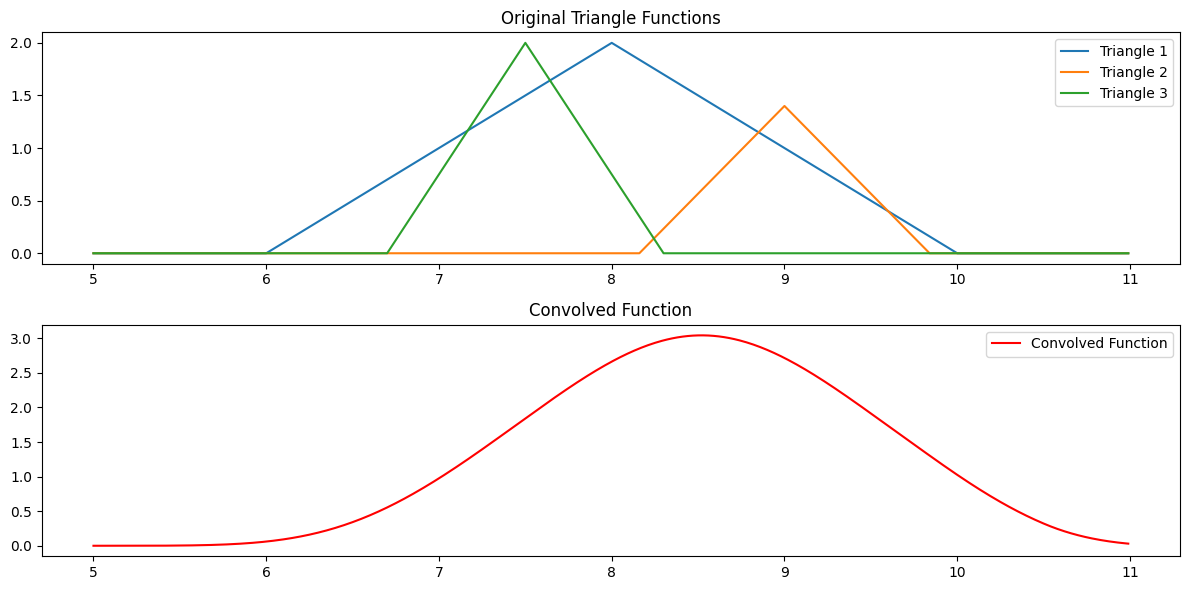

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the discretization step
dx = 0.01

# Define the ranges for the functions
x = np.arange(5, 11, dx)

# Define the first triangle function, centered at 8.0, height=1, width=2
def triangle(x, center, width, height):
    return np.maximum(height - np.abs(x - center) / (width / 2), 0)


# Calculate the triangle functions
y1 = triangle(x, 8, 2, 2)
y2 = triangle(x,9,1.2,1.4)
y3 = triangle(x,7.5,0.8,2)
# Perform the convolution
y_convolved = np.convolve(y1, y2, mode='same') * dx
y_convolved_again = np.convolve(y_convolved, y3, mode='same') * dx


# Adjust the x-axis for the convolution result to match its length
x_convolved = np.linspace(x.min(), x.max(), len(y_convolved_again))

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y1, label='Triangle 1')
plt.plot(x, y2, label='Triangle 2')
plt.plot(x, y3, label='Triangle 3')
plt.title('Original Triangle Functions')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x_convolved, y_convolved_again, color='red', label='Convolved Function')
plt.title('Convolved Function')
plt.legend()

plt.tight_layout()
plt.show()


### Combining Triangles as a Triangle

### Getting Most Similar images via SSIM

https://en.wikipedia.org/wiki/Structural_similarity_index_measure#Algorithm




In [18]:
# For each Image Index
#     For each Model/Classifier
#         Print the Scaled Confidence Score of each possible class (Confidence Score * the model's accuracy)
#         Calculate error bounds [a,b] as +/- 1.96 * sqrt(p(1-p)/n) where p = model accuracy, n = number of samples
#         Determine width of the triangle at the error bounds = (b - a)*confidence score
#         Determine height at confidence score = 2/width
        
        
#     Aggregate the heights and widths and confidence score of the models for each class
# Return the image index, average confidence score, the average height and the average width for each class


# Initialize variables
n = 10000 # Number of samples
accuracies = scores[1:5]  # Assuming scores is a list of accuracies for each model
z_score = 1.96  # Z-score for 95% confidence interval
# Calculate the standard error for each model
standard_deviations = np.sqrt(accuracies * (1 - accuracies) / n)  # Standard deviation for each model

# error_bounds = z_score * np.sqrt(accuracies * (1 - accuracies) / n) # Calculate error bounds for each model

softmax_outputs = [model.predict(test_images), model2.predict(test_images), model3.predict(test_images),
                   model4.predict(test_images), model5.predict(test_images)]

# Initialize a 3D array to store the results # Shape: (3 metrics, 10 classes, number of images)
results = np.zeros((3, 10, len(test_images)))  

# For each Image
for index in range(len(test_images)):  # Assuming test_images is defined
    for class_idx in range(10):  # Assuming 10 classes
        total_confidence = 0
        total_heights = 0
        total_widths = 0
        
        for i, softmax_output in enumerate(softmax_outputs):
            confidence_score = softmax_output[index, class_idx]  # Confidence score for this class from the i-th model
            scaled_confidence = confidence_score * accuracies[i]  # Scaled confidence score
            
            width = 2 * error_bounds[i]*confidence_score # Width of the triangle at the error bounds
            height = 2 / width  # Height at confidence score
            
            total_confidence += scaled_confidence
            total_heights += height
            total_widths += width
        
        # Calculate averages for this class for this image
        avg_confidence = total_confidence / len(softmax_outputs)
        avg_height = total_heights / len(softmax_outputs)
        avg_width = total_widths / len(softmax_outputs)
        
        # Store the averages in the results array
        results[0, class_idx, index] = avg_confidence
        results[1, class_idx, index] = avg_height
        results[2, class_idx, index] = avg_width

# Example: Print the results for the first image across all classes for each metric
print(f"Average Confidence Scores for Image 0: {results[0, :, 0]}")
print(f"Average Heights for Image 0: {results[1, :, 0]}")
print(f"Average Widths for Image 0: {results[2, :, 0]}")



TypeError: unsupported operand type(s) for -: 'int' and 'list'

Highest SSIM index: 85, SSIM Value: 0.00044445275803480986


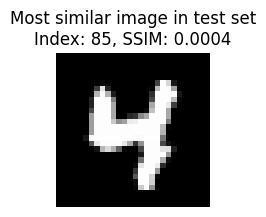

0.9999999999999999


In [ ]:
from skimage.metrics import structural_similarity as compare_ssim
import numpy as np
import cv2


# Placeholder for SSIM scores
ssim_scores = []

# Iterate over each test image
for test_image in test_images:
    # Resize the test image to 28x28
    test_image = cv2.resize(test_image, (28, 28))
    ssim = compare_ssim(image_resized, test_image, data_range=test_image.max() - test_image.min())
    ssim_scores.append(ssim)

# Find the index of the test image with the highest SSIM score

ssim_scores = ssim_scores/np.sum(ssim_scores) # Make this a probability distribution
max_ssim_index = np.argmax(ssim_scores)
max_ssim_value = ssim_scores[max_ssim_index]

print(f"Highest SSIM index: {max_ssim_index}, SSIM Value: {max_ssim_value}")

# If needed, display the most similar image
plt.figure(figsize=(2, 2))
plt.imshow(test_images[max_ssim_index], cmap='gray')
plt.title(f"Most similar image in test set\nIndex: {max_ssim_index}, SSIM: {max_ssim_value:.4f}")
plt.axis('off')
plt.show()

y=np.sum(ssim_scores)
print(y)


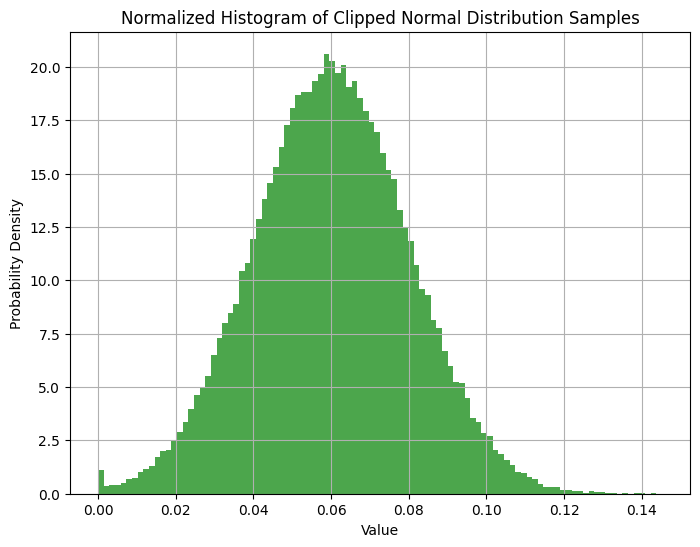

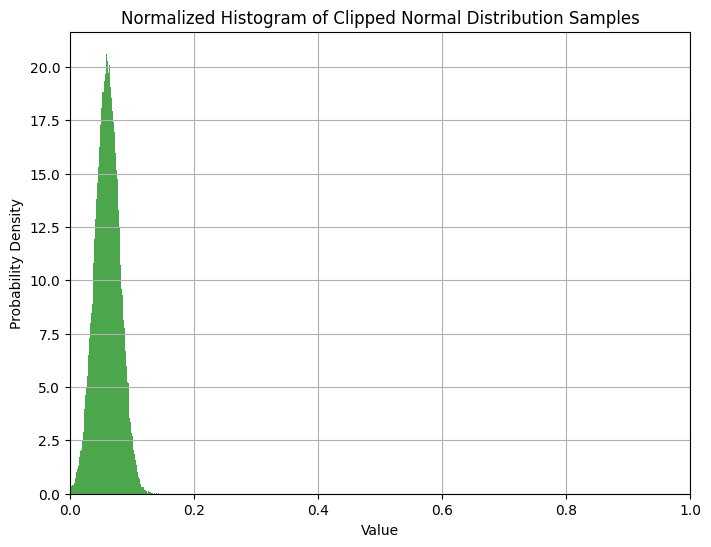

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0.06
sigma = 0.02
n_samples = 100000

# Generating samples
samples = np.random.normal(mu, sigma, n_samples)

# Clipping samples
clipped_samples = np.clip(samples, 0, 1)


# Plotting normalized histogram
plt.figure(figsize=(8, 6))
plt.hist(clipped_samples, bins=100, color='green', alpha=0.7, density=True)
plt.title('Normalized Histogram of Clipped Normal Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


# Plotting normalized histogram
plt.figure(figsize=(8, 6))
plt.hist(clipped_samples, bins=100, color='green', alpha=0.7, density=True)
plt.title('Normalized Histogram of Clipped Normal Distribution Samples')
plt.xlabel('Value')
plt.xlim(0, 1)  # Setting the x-axis limits to [0, 1]
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()
